# Análise de dados em Python

Usaremos como exemplo de análise de dados o pacote ``pandas`` que suporta estruturas de dados flexíveis para manipulação e análise. Os principais usos de Pandas são: dados em tabelas de bancos de dados ou planilhas; séries temporais ordenadas ou não; matrizes homogêneas ou não; e conjuntos de dados estatísticos.

O Pandas suporta basicamente dois tipos de estruturas de dados:
- ``Series`` - dados de uma dimensão (1D)
- ``DataFrame`` - tabela de duas dimensões (2D)
  
O código abaixo mostra o exemplo de uso do Pandas para criação de uma Series com números, e o próximo mostra a criação de um DataFrame com nome, idade e sexo. O comando para importar pacotes em Python é o ``import`` como mostrado na linha 1.

In [7]:
import pandas as pd

s = pd.Series([1, 3, 5, 6, 8])
s

0    1
1    3
2    5
3    6
4    8
dtype: int64

In [3]:
df = pd.DataFrame({
     'Nome': [ 'Joao Pereira Cavalcanti',
     		  'Ana Pinto Rocha',
              'Maria Silva Campos',
              'Ana Novaes Alves'],
     'Idade': [22, 35, 58, 38],
     'Sexo': ['M', 'F', 'F', 'F']}
   )
df


,Nome,Idade,Sexo
0,Joao Pereira Cavalcanti,22,M
1,Ana Pinto Rocha,35,F
2,Maria Silva Campos,58,F
3,Ana Novaes Alves,38,F


Podemos acessar as colunas individualmente como abaixo:

In [4]:
df['Idade']

0    22
1    35
2    58
3    38
Name: Idade, dtype: int64

Para obter dados estatísticos sobre uma coluna, podemos usar métodos da coluna como ``min()``, ``max()`` e a média ``mean()``.

In [5]:
print( df['Idade'].min()  )
print( df['Idade'].max()  )
print( df['Idade'].mean() )

22
58
38.25


O método ``describe()`` mostra as principais informações estatísticas sobre a coluna.

In [6]:
df['Idade'].describe()

count     4.000000
mean     38.250000
std      14.885675
min      22.000000
25%      31.750000
50%      36.500000
75%      43.000000
max      58.000000
Name: Idade, dtype: float64

Pandas possui funcionalidades de leitura de dados tanto localmente quanto remoto em diversos formatos. O código abaixo mostra a leitura de um arquivo CSV remoto em um dataFrame e posterior resumo dos dados com a função ``describe()``.  É possível observar informações sobre as colunas lidas e dado estatísticos sobre os valores tais como média, desvio padrão, mínimo e máximo, etc.

In [3]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv")
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos selecionar apenas um subconjunto de colunas da tabela maior como no exemplo linha 1 onde seleciona as colunas ``Age`` e ``Sex`` e mostra as primeiras cinco linhas com a função ``head()``.

In [8]:
idade_sexo = titanic[['Age', 'Sex']]
idade_sexo.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


A consulta sobre dados estatísticos pode ser feito por coluna como na Figura 40 onde as informações de valores mínimo, máximo e média são mostrados para a coluna ``Age``.

In [9]:
print( titanic['Age'].min()  )
print( titanic['Age'].max()  )
print( titanic['Age'].mean() )

0.42
80.0
29.69911764705882


Também podemos aplicar testes relacionais e lógicos para selecionar determinadas linhas da tabela como no exemplo. O primeiro exemplo cria a tabela ``acima_35`` com todos os passeiros que tinham idade acima de 35 anos resultando em 217 linhas. Depois, a outra seleção cria a tabela ``acima_M_35`` com todos os passageiros acima de 35 anos e do sexo masculino resultando em 144 linhas. Note que em ambos os casos usamos operadores relacionados para efeitos de comparação e um operador lógico no segundo exemplo.

In [10]:
acima_35 = titanic[ titanic['Age'] > 35 ]
len( acima_35 )

217

In [11]:
acima_M_35 = titanic[ (titanic['Age'] > 35) & (titanic['Sex'] == 'male') ]
len( acima_M_35 )

144

A geração de gráficos é integrada e usa  o pacote ``matplotlib`` como no exemplo da Figura 42. O gráfico exemplo é um histograma baseado na idade dos passageiros. Note que a maioria dos passagens estava na faixa entre 20 e 30 anos de idade, tendo inclusive alguns abaixo de 10 anos e acima de 70.

<Axes: ylabel='Frequency'>

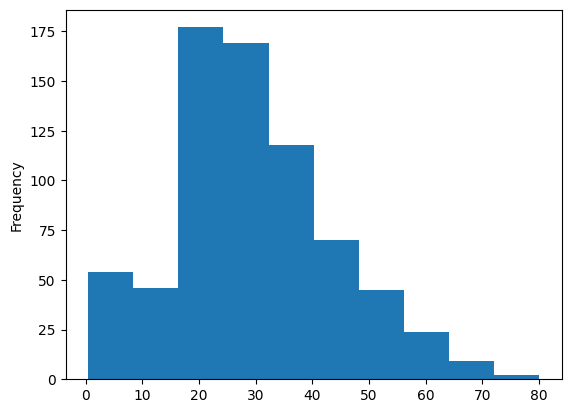

In [12]:
titanic['Age'].plot.hist()

<Axes: xlabel='Sex'>

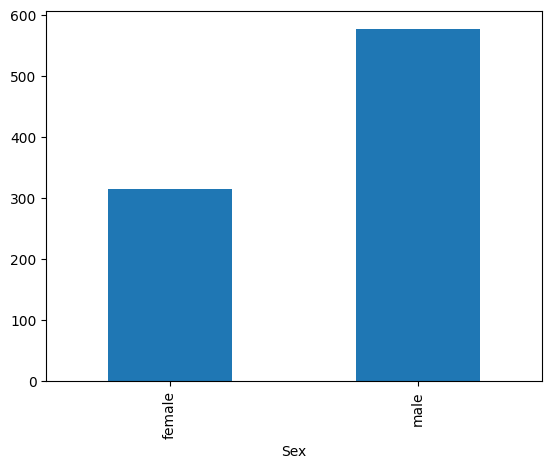

In [13]:
titanic.groupby("Sex").Sex.count().plot.bar()

Podemos visualizar quantos passagens sobreviram com a coluna ``Survived``. Para tanto, o método ``value_counts()`` conta a frequência de cada valor em uma coluna como no exemplo abaixo.

In [5]:
titanic.value_counts("Survived")

Survived
0    549
1    342
Name: count, dtype: int64

Podemos calcular esse valores em termos de porcentagem como abaixo: criamos um *Series* ``sobreviventes`` com os valores dados pelo método ``value_counts()`` e calculamos a porcentagem dividindo pela soma de todos os valores da coluna com o método ``sum()``.

In [33]:
sobreviventes = titanic.value_counts("Survived")
sobreviventes = 100 * sobreviventes / sobreviventes.sum()
sobreviventes

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

Os mesmo valores podem ser representados por um gráfico de pizza.

<Axes: ylabel='count'>

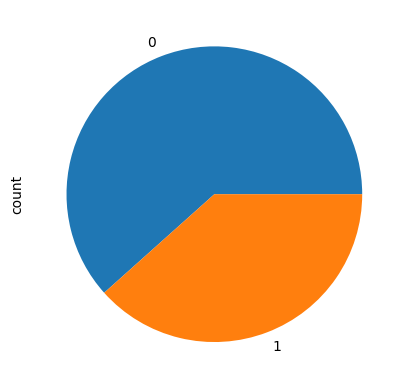

In [26]:
titanic.value_counts("Survived").plot.pie()